<a href="https://colab.research.google.com/github/Kaifquresh/Health-Insuarnce-Predictor-App/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


In [24]:
#Loading Dataset
fraud_detection = pd.read_csv("/content/Fraud_Analysis_Dataset.csv")


Exploratory Data analysis

In [25]:
#importing first 5 datset
fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [26]:
fraud_detection.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0
11141,7,PAYMENT,9235.58,C1637966097,39963.00,30727.42,M609545864,0.00,0.00,0


Dataset Information

In [27]:
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


Feature Engineering

In [28]:
#Check Missing values
fraud_detection.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [29]:
print(fraud_detection['isFraud'].value_counts())


isFraud
0    10000
1     1142
Name: count, dtype: int64


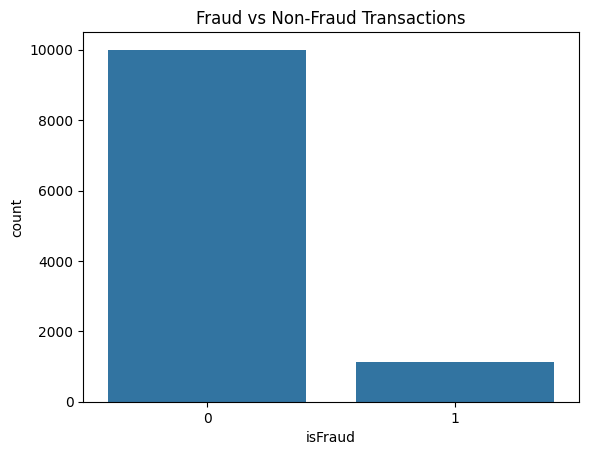

In [30]:
# Fraud distribution
sns.countplot(x='isFraud', data=fraud_detection)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


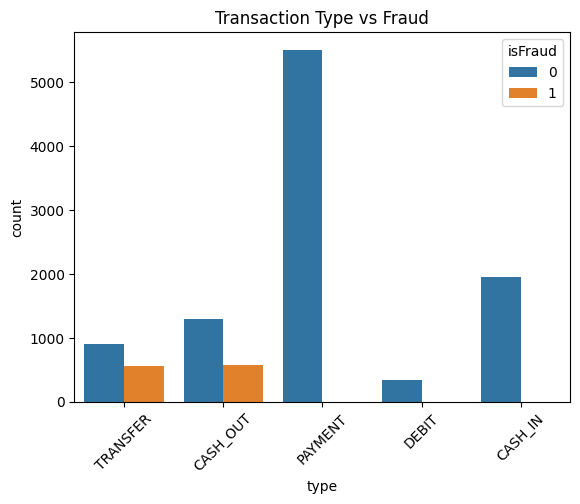

In [31]:
# Transaction types vs fraud
sns.countplot(x='type', hue='isFraud', data=fraud_detection)
plt.title('Transaction Type vs Fraud')
plt.xticks(rotation=45)
plt.show()

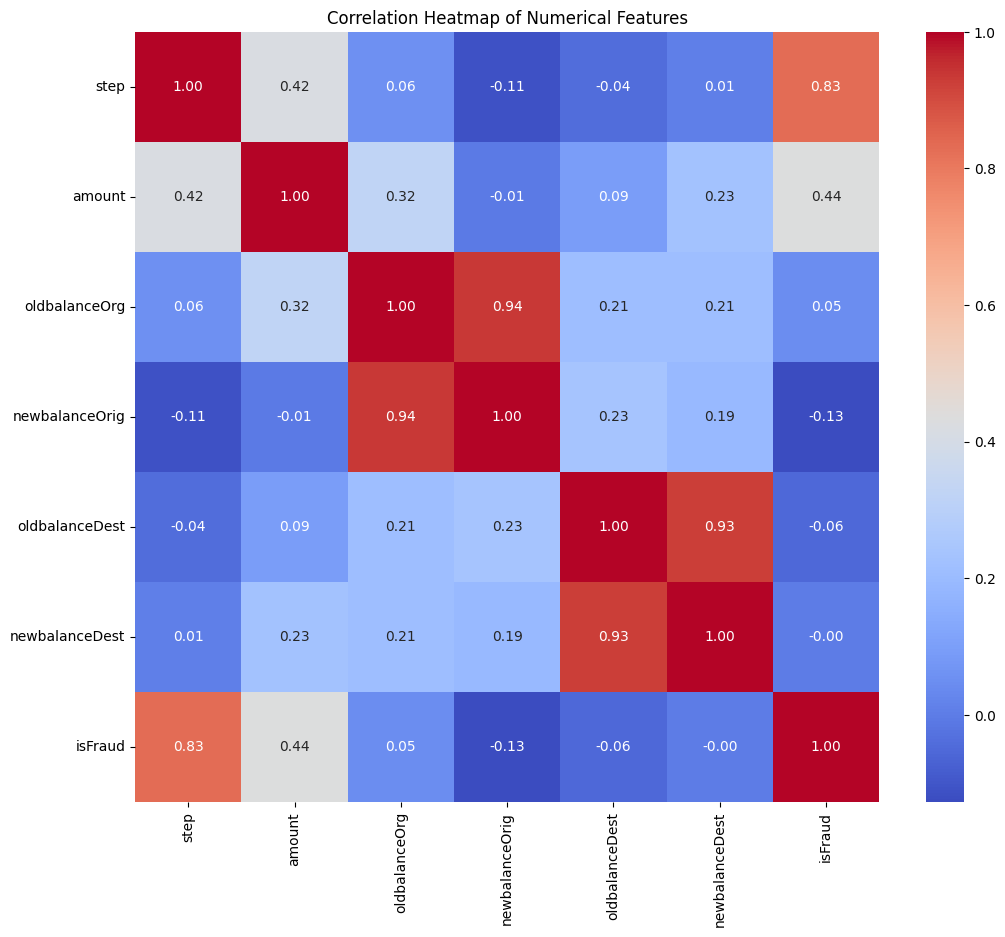

In [32]:
# Select only numerical columns for correlation
numerical_df = fraud_detection.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [33]:
# Encode categorical variables
le_type = LabelEncoder()
fraud_detection['type_encoded'] = le_type.fit_transform(fraud_detection['type'])


Feature creation: balance change


In [34]:
fraud_detection['orig_diff'] = fraud_detection['oldbalanceOrg'] - fraud_detection['newbalanceOrig']
fraud_detection['dest_diff'] = fraud_detection['newbalanceDest'] - fraud_detection['oldbalanceDest']


In [35]:
# Drop unused columns
features = ['amount', 'type_encoded', 'oldbalanceOrg', 'newbalanceOrig',
            'oldbalanceDest', 'newbalanceDest', 'orig_diff', 'dest_diff']


In [36]:
X = fraud_detection[features]
y = fraud_detection['isFraud']


In [37]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train Test SPlit

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [39]:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [40]:
# Evaluate Logistic Regression
y_pred_lr = logistic_regression_model.predict(X_test)
y_proba_lr = logistic_regression_model.predict_proba(X_test)[:, 1]
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2996
           1       0.98      0.62      0.76       347

    accuracy                           0.96      3343
   macro avg       0.97      0.81      0.87      3343
weighted avg       0.96      0.96      0.96      3343

ROC-AUC: 0.9591193637626345


In [41]:
# Evaluate Random Forest
y_pred_rf = random_forest_model.predict(X_test)
y_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2996
           1       0.99      0.96      0.98       347

    accuracy                           0.99      3343
   macro avg       0.99      0.98      0.99      3343
weighted avg       0.99      0.99      0.99      3343

ROC-AUC: 0.9960716113319199


In [42]:
# Evaluate Gradient Boosting
y_pred_gb = gradient_boosting_model.predict(X_test)
y_proba_gb = gradient_boosting_model.predict_proba(X_test)[:, 1]
print("\nGradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2996
           1       0.99      0.96      0.98       347

    accuracy                           1.00      3343
   macro avg       0.99      0.98      0.99      3343
weighted avg       1.00      1.00      1.00      3343

ROC-AUC: 0.9965746836319702


Financial Impact Analysis

In [43]:
# Assume average fraud transaction amount as cost of fraud
fraud_costs = fraud_detection[fraud_detection['isFraud'] == 1]['amount']
average_fraud_cost = fraud_costs.mean()


In [45]:
from sklearn.metrics import precision_recall_fscore_support

# Predicting labels with the Random model
best_model = random_forest_model
y_pred = best_model.predict(X_test)

# Calculate precision, recall, and f1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Calculate TP and FP
TP = sum((y_pred == 1) & (y_test == 1))
FP = sum((y_pred == 1) & (y_test == 0))

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)


True Positives (TP): 332
False Positives (FP): 2


In [47]:
from sklearn.metrics import precision_recall_fscore_support

# Predicting labels with the Random model
best_model = gradient_boosting_model
y_pred = best_model.predict(X_test)

# Calculate precision, recall, and f1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Calculate TP and FP
TP = sum((y_pred == 1) & (y_test == 1))
FP = sum((y_pred == 1) & (y_test == 0))

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)


True Positives (TP): 334
False Positives (FP): 3


In [48]:
from sklearn.metrics import precision_recall_fscore_support

# Predicting labels with the Random model
best_model = logistic_regression_model
y_pred = best_model.predict(X_test)

# Calculate precision, recall, and f1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Calculate TP and FP
TP = sum((y_pred == 1) & (y_test == 1))
FP = sum((y_pred == 1) & (y_test == 0))

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)


True Positives (TP): 216
False Positives (FP): 4


In [49]:
# Financial metrics
revenue_saved = TP * average_fraud_cost
false_alarm_cost = FP * 5  # Assume $5 per false alarm investigation
net_profit = revenue_saved - false_alarm_cost



In [50]:
print("\nFinancial Impact:")
print(f"Revenue Saved: ${revenue_saved:,.2f}")
print(f"False Alarm Cost: ${false_alarm_cost:,.2f}")
print(f"Net Profit: ${net_profit:,.2f}")



Financial Impact:
Revenue Saved: $257,607,849.33
False Alarm Cost: $20.00
Net Profit: $257,607,829.33


Models Performance Visualization

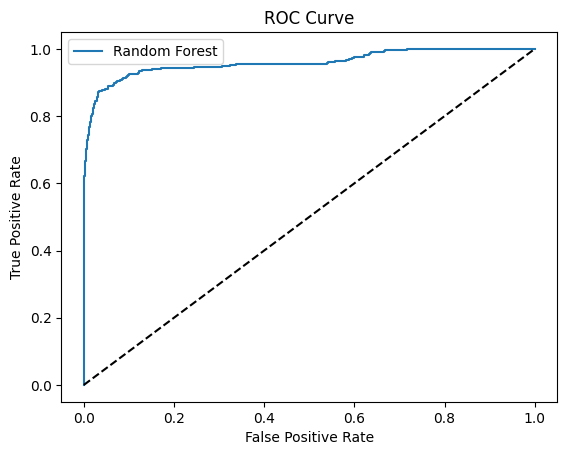

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute FPR and TPR for ROC curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Plot ROC Curve
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Gradient Boosting is the best model out of all

In [52]:
# Predict fraud/non-fraud labels
y_pred_labels = best_model.predict(X_test)

# View some predictions
print(y_pred_labels[:10])  # prints first 10 predicted labels (0 = non-fraud, 1 = fraud)


[0 1 0 0 0 1 0 0 0 0]


In [53]:
# Predict probabilities for class 1 (fraud)
y_pred_probs = best_model.predict_proba(X_test)[:, 1]

# Print top 10 predicted fraud probabilities
print(y_pred_probs[:10])


[4.86566550e-02 1.00000000e+00 3.11519900e-03 7.49671521e-02
 4.38988116e-02 8.48096693e-01 5.17627500e-02 6.25394139e-02
 5.18977316e-02 2.13826310e-11]
